Estimated number of clusters: 2
Estimated number of noise points: 0


NameError: name 'labels_true' is not defined

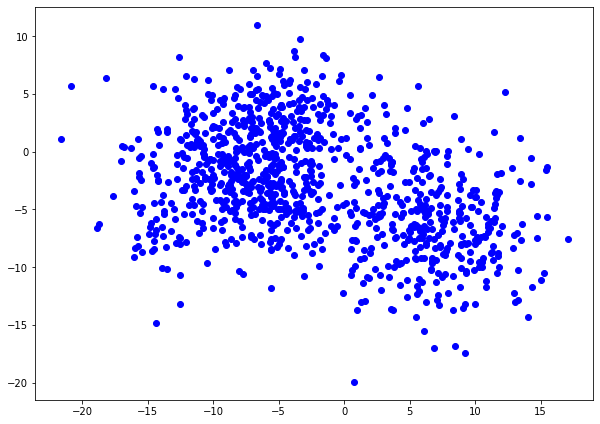

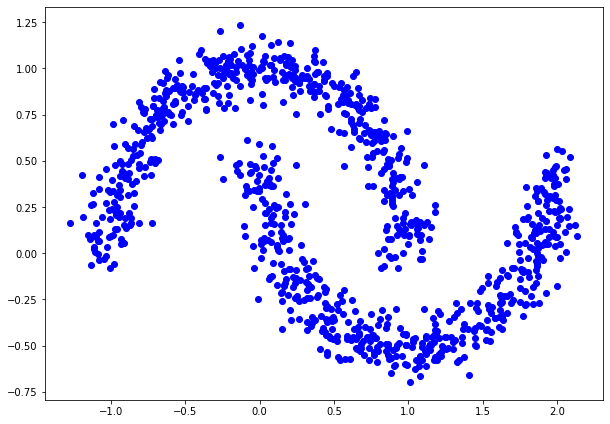

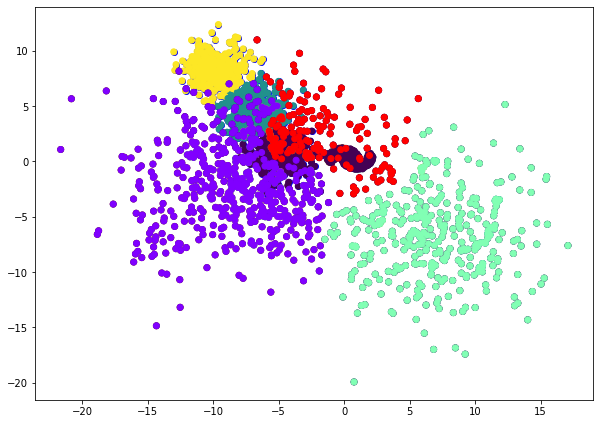

In [2]:
# Khadijeh Arabi 11945135
import numpy as np
import pandas as pd
import csv
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import normalized_mutual_info_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# read data
data = np.loadtxt ('noCluster2_1K.csv', skiprows=1, delimiter = ',')
data1 = np.loadtxt ('noCluster2_2K.csv', skiprows=1, delimiter = ',')
data2 = np.loadtxt ('noCluster3_1K.csv', skiprows=1, delimiter = ',')
data
x = data[:, :2]
y = data1[:, :2]
z = data2[:, :2]
# plot data
x1 = data[:,0:2].astype(float)
labels = data[:,-1]
y1 = np.array([i == ' 1 ' for i in labels])
i0 = np.where( y1 == True)[0]
i1 = np.where( y1 == False)[0]
y1 = y1.astype(int)

plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(x1[i0,0],x1[i0,1], c='r')
plt.scatter(x1[i1,0],x1[i1,1], c='b')

# plot file 2
x1 = data1[:,0:2].astype(float)
labels = data[:,-1]
y1 = np.array([i == ' 1 ' for i in labels])
i0 = np.where( y1 == True)[0]
i1 = np.where( y1 == False)[0]
y1 = y1.astype(int)

plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(x1[i0,0],x1[i0,1], c='r')
plt.scatter(x1[i1,0],x1[i1,1], c='b')

#plot file3
x1 = data2[:,0:2].astype(float)
labels = data[:,-1]
y1 = np.array([i == ' 1 ' for i in labels])
i0 = np.where( y1 == True)[0]
i1 = np.where( y1 == False)[0]
y1 = y1.astype(int)

plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(x1[i0,0],x1[i0,1], c='r')
plt.scatter(x1[i1,0],x1[i1,1], c='b')

#KMEANS
kmeans1 = KMeans(n_clusters = 3)
labels1 = kmeans1.fit_predict(x)
kmeans2 = KMeans(n_clusters = 3)
labels2 = kmeans2.fit_predict(y)
kmeans3 = KMeans(n_clusters = 3)
labels3 = kmeans3.fit_predict(z)

#plot k-means clusters
plt.scatter(x[:,0], x[:,1], c=labels1)

plt.scatter(y[:,0], y[:,1], c=labels2)

plt.scatter(z[:,0], z[:,1], c=labels3)

#DBSCAN

db = DBSCAN(eps=0.3, min_samples=3).fit(x)
f = db.labels_
plt.scatter(x[:,0], x[:,1], c=f)

db = DBSCAN(eps=0.3, min_samples=3).fit(y)
f = db.labels_
plt.scatter(y[:,0], y[:,1], c=f)

#Average Link

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(x)
plt.scatter(x[:,0],x[:,1], c=cluster.labels_, cmap='rainbow')

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x, labels))

# #############################################################################
# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = x[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = x[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# NMI
groundTruth = [0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1]
results = []
results.append(list(kmeans1.labels_))

#AgglomerativeClustering
results.append(list(cluster.labels_))

#DBSCAN
results.append(list(db.labels_))
results

# Append the results into lists
nmiResults = []
for x in results:
    nmiResults.append(normalized_mutual_info_score(groundTruth, x))

